In [67]:
import pandas as pd, tensorflow as tf, matplotlib.pyplot as plt, numpy as np, os
from   sklearn.model_selection import train_test_split
from   sklearn.metrics import mean_squared_error
from   tensorflow import keras
from   math import sqrt
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [5]:
#Data Base Import
db=pd.read_excel('db.xlsx')

#Data Extraction
y1 = db ["As_opt"]
y2 = db ["d_opt"]
y3 = db ["As_opt_p"]
x  = db [["fc","fy","Mu","b"]]

#RMSE def
def rmse(ytrue,ypred):
  return tf.sqrt(tf.reduce_mean(tf.square(ytrue - ypred)))

In [68]:
#Split: DataBase into: Training and Testing Data
xtrain,xtest,ytrain1,ytest1,ytrain2,ytest2,ytrain3,ytest3 = train_test_split(x,y1,y2,y3,test_size=0.2,random_state=1) 
#Split: TrainingData into: Training and Validating Data
xtrain,xval,ytrain1,yval1,ytrain2,yval2,ytrain3,yval3 = train_test_split(xtrain,ytrain1,ytrain2,ytrain3,test_size=0.05,random_state=1) 

In [69]:
# Auto-Saving Model Training: Callback ModelCheckpoint
checkpoint = ModelCheckpoint(r'D:\ToolBox\py\proyect_1\RedesNeuronales\modelo_checkpoint.keras', monitor='val_loss', save_best_only=True)

In [70]:
epochs = 5
#ANN Asopt model def
mdl_Asopt=tf.keras.Sequential([
    tf.keras.layers.Dense(40,activation="relu",input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(1)])

#ANN dopt model def
mdl_dopt = tf.keras.Sequential([
    tf.keras.layers.Dense(40,activation="relu",input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(1)])

#ANN dopt model def
mdl_Asopt_p = tf.keras.Sequential([
    tf.keras.layers.Dense(40,activation="relu",input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(1)])

c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
# Model Stats
mdl_Asopt.summary()
mdl_dopt.summary()
mdl_Asopt_p.summary()
print(mdl_Asopt.weights)
print(mdl_dopt.weights)
print(mdl_Asopt_p.weights)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 40)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,161 (20.16 KB)

 Trainable params: 5,161 (20.16 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 40)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,161 (20.16 KB)

 Trainable params: 5,161 (20.16 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 40)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,161 (20.16 KB)

 Trainable params: 5,161 (20.16 KB)

 Non-trainable params: 0 (0.00 B)

[<KerasVariable shape=(4, 40), dtype=float32, path=sequential_9/dense_45/kernel>, <KerasVariable shape=(40,), dtype=float32, path=sequential_9/dense_45/bias>, <KerasVariable shape=(40, 40), dtype=float32, path=sequential_9/dense_46/kernel>, <KerasVariable shape=(40,), dtype=float32, path=sequential_9/dense_46/bias>, <KerasVariable shape=(40, 40), dtype=float32, path=sequential_9/dense_47/kernel>, <KerasVariable shape=(40,), dtype=float32, path=sequential_9/dense_47/bias>, <KerasVariable shape=(40, 40), dtype=float32, path=sequential_9/dense_48/kernel>, <KerasVariable shape=(40,), dtype=float32, path=sequential_9/dense_48/bias>, <KerasVariable shape=(40, 1), dtype=float32, path=sequential_9/dense_49/kernel>, <KerasVariable shape=(1,), dtype=float32, path=sequential_9/dense_49/bias>]
[<KerasVariable shape=(4, 40), dtype=float32, path=sequential_10/dense_50/kernel>, <KerasVariable shape=(40,), dtype=float32, path=sequential_10/dense_50/bias>, <KerasVariable shape=(40, 40), dtype=float32, 

In [72]:
# Model Conpiling
mdl_Asopt.compile(optimizer='adam',loss=rmse,metrics=['accuracy'])
mdl_dopt.compile(optimizer='adam',loss = rmse,metrics=['accuracy'])
mdl_Asopt_p.compile(optimizer='adam',loss = rmse,metrics=['accuracy'])

In [76]:
# Model Parameters Training 
mdl_Asopt_fit   = mdl_Asopt.fit(xtrain,ytrain1,epochs=epochs,validation_data= (xval, yval1),verbose=True,callbacks=[checkpoint])
mdl_dopt_fit    = mdl_dopt.fit(xtrain,ytrain2,epochs=epochs,validation_data= (xval, yval2),verbose=True,callbacks=[checkpoint])
mdl_Asopt_p_fit = mdl_Asopt_p.fit(xtrain,ytrain3,epochs=epochs,validation_data= (xval, yval3),verbose=True,callbacks=[checkpoint])

2494/2494 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3659 - val_accuracy: 0.0000e+00 - val_loss: 0.3069
2494/2494 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0000e+00 - loss: 0.7283 - val_accuracy: 0.0000e+00 - val_loss: 1.1774
2494/2494 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4165 - val_accuracy: 0.0000e+00 - val_loss: 0.5600


In [54]:
# Stats: Model Parameters Training 
print(mdl_Asopt_fit.history)
print(mdl_dopt_fit.history)
print(mdl_Asopt_p_fit.history)

{'accuracy': [0.0], 'loss': [0.7015402317047119], 'val_accuracy': [0.0], 'val_loss': [0.356536328792572]}
{'accuracy': [0.0], 'loss': [1.0132313966751099], 'val_accuracy': [0.0], 'val_loss': [0.6981805562973022]}
{'accuracy': [0.0], 'loss': [1.384934663772583], 'val_accuracy': [0.0], 'val_loss': [0.3356184959411621]}


In [2]:
## Different Method for loading proggress on other scripts
## Save: arquitecture and training model in .keras file (uptodate compared to .h5)
#mdl_Asopt.save(r'D:\ToolBox\py\proyect_1\RedesNeuronales\mdl_Asopt.keras')
#mdl_dopt.save(r'D:\ToolBox\py\proyect_1\RedesNeuronales\mdl_dopt.keras')
#mdl_Asopt_p.save(r'D:\ToolBox\py\proyect_1\RedesNeuronales\mdl_Asopt_p.keras')
## Save model parameters
#mdl_Asopt.save_weights(r'D:\ToolBox\py\proyect_1\RedesNeuronales\prm_Asopt.keras.weights.h5')
#mdl_dopt.save_weights(r'D:\ToolBox\py\proyect_1\RedesNeuronales\prm_dopt.keras.weights.h5')
#mdl_Asopt_p.save_weights(r'D:\ToolBox\py\proyect_1\RedesNeuronales\prm_Asopt_p.keras.weights.h5')
## Load parameters only
#mdl_Asopt.load_weights(r'D:\ToolBox\py\proyect_1\RedesNeuronales\prm_Asopt.keras.weights.h5')
#mdl_dopt.load_weights(r'D:\ToolBox\py\proyect_1\RedesNeuronales\prm_dopt.keras.weights.h5')
#mdl_Asopt_p.load_weights(r'D:\ToolBox\py\proyect_1\RedesNeuronales\prm_Asopt_p.keras.weights.h5')
## Load parameters only
#mdl_Asopt.load_weights(r'D:\ToolBox\py\proyect_1\RedesNeuronales\prm_Asopt.keras.weights.h5')
#mdl_dopt.load_weights(r'D:\ToolBox\py\proyect_1\RedesNeuronales\prm_dopt.keras.weights.h5')
#mdl_Asopt_p.load_weights(r'D:\ToolBox\py\proyect_1\RedesNeuronales\prm_Asopt_p.keras.weights.h5')

# PLOTEO DEL MODELO DE "AS (cm^2)"


2625/2625 [==============================] - 11s 4ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

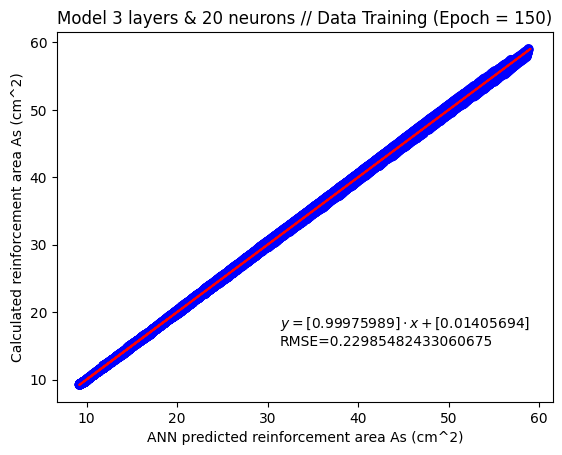

In [3]:
# COMPARING PREDICTED VALUES VS THEORETICAL VALUES
#Plotting
ypred1=mdl_Asopt.predict(xtrain)

RMSE=sqrt(mean_squared_error(ytrain1,ypred1))

# Coefficients
m, b = np.polyfit(ytrain1, ypred1, 1)

#Plotting scatter points and 1st-degree polynom
plt.scatter(ypred1,ytrain1,facecolors = 'none',edgecolors='b')
plt.plot(ytrain1, m*ytrain1 + b, color='red')

# Information Plot
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted reinforcement area As (cm^2)')
plt.ylabel('Calculated reinforcement area As (cm^2)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

657/657 [==============================] - 3s 4ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

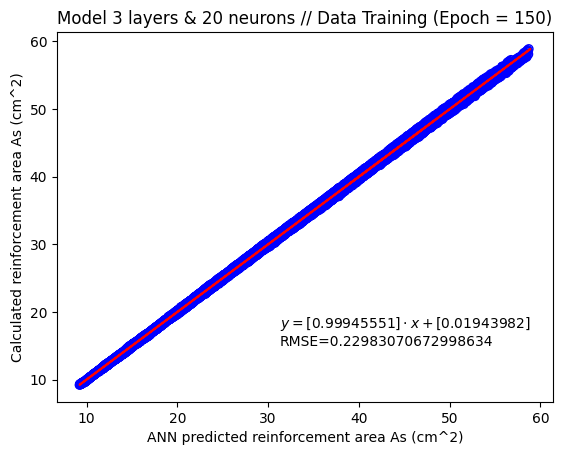

In [4]:
# TESTING PREDICTED VALUES VS TESTING VALUES
#Ploteando los Resultados
ypred1=mdl_Asopt.predict(xtest)
RMSE=sqrt(mean_squared_error(ytest1,ypred1))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytest1, ypred1, 1)

plt.scatter(ypred1,ytest1,facecolors = 'none',edgecolors='b')
plt.plot(ytest1, m*ytest1 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted reinforcement area As (cm^2)')
plt.ylabel('Calculated reinforcement area As (cm^2)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

# PLOTEO DEL MODELO DE "d (cm)"

2625/2625 [==============================] - 10s 4ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

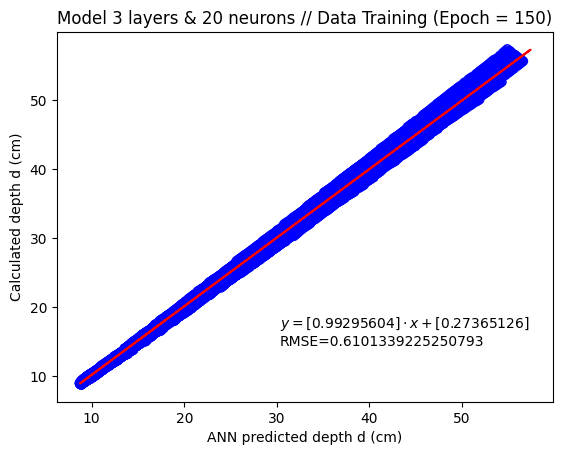

In [5]:
# COMPARING PREDICTED VALUES VS THEORETICAL VALUES
#Ploteando resultados
ypred2 = mdl_dopt.predict(xtrain)

RMSE = sqrt(mean_squared_error(ytrain2,ypred2))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytrain2, ypred2, 1)

plt.scatter(ypred2,ytrain2,facecolors = 'none',edgecolors='b')
plt.plot(ytrain2, m*ytrain2 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted depth d (cm)')
plt.ylabel('Calculated depth d (cm)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')	

657/657 [==============================] - 3s 4ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')

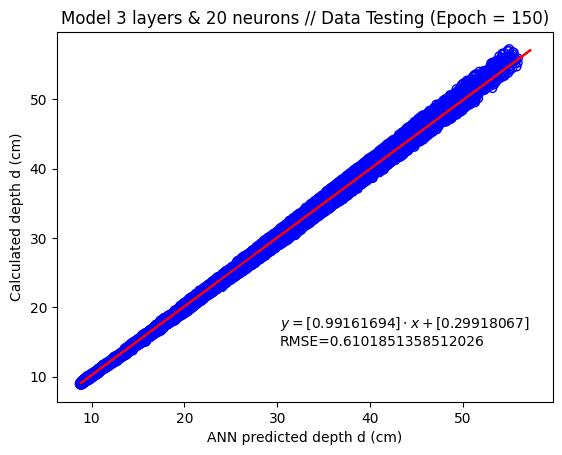

In [6]:
# TESTING PREDICTED VALUES VS TESTING VALUES
ypred = mdl_dopt.predict(xtest)

RMSE = sqrt(mean_squared_error(ytest2,ypred))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytest2, ypred, 1)

plt.scatter(ypred,ytest2,facecolors = 'none',edgecolors='b')
plt.plot(ytest2, m*ytest2 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted depth d (cm)')
plt.ylabel('Calculated depth d (cm)')
plt.title('Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')

# PLOTEO DEL MODELO DE Asopt_p

2625/2625 [==============================] - 10s 4ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

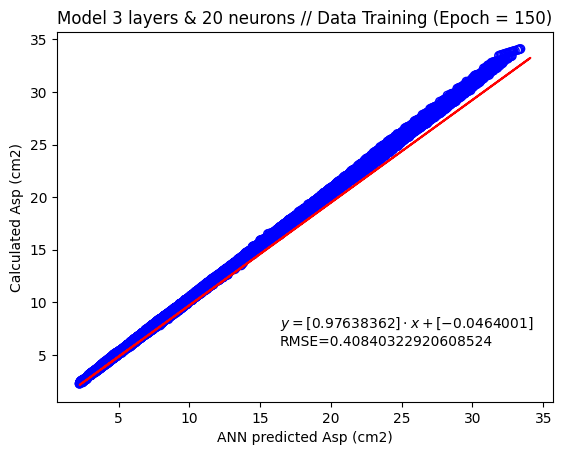

In [7]:
# COMPARING PREDICTED VALUES VS THEORETICAL VALUES
#Ploteando resultados
ypred3 = mdl_Asopt_p.predict(xtrain)

RMSE = sqrt(mean_squared_error(ytrain3,ypred3))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytrain3, ypred3, 1)

plt.scatter(ypred3,ytrain3,facecolors = 'none',edgecolors='b')
plt.plot(ytrain3, m*ytrain3 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted Asp (cm2)')
plt.ylabel('Calculated Asp (cm2)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

657/657 [==============================] - 2s 3ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')

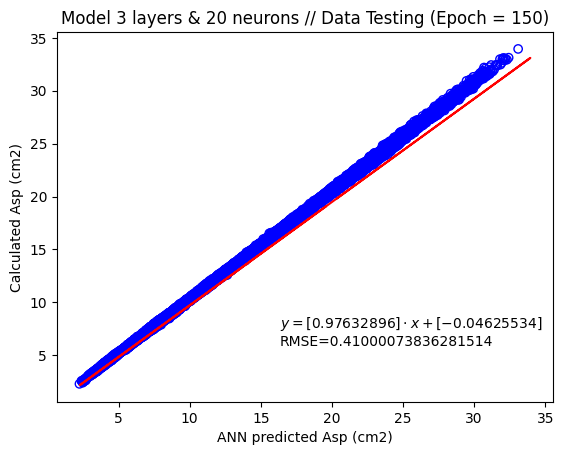

In [8]:
# TESTING PREDICTED VALUES VS TESTING VALUES
ypred3 = mdl_Asopt_p.predict(xtest)

RMSE = sqrt(mean_squared_error(ytest3,ypred3))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytest3, ypred3, 1)

plt.scatter(ypred3,ytest3,facecolors = 'none',edgecolors='b')
plt.plot(ytest3, m*ytest3 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted Asp (cm2)')
plt.ylabel('Calculated Asp (cm2)')
plt.title('Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')

In [9]:
import pandas as pd
#Datos de ETABS
fc = [40]
fy = [420]
Mu = [800]
b =  [800]

#Almacenamiento de datos del ETABS
data_Etabs        = pd.DataFrame()
data_Etabs ['fc'] = fc
data_Etabs ['fy'] = fy
data_Etabs ['Mu'] = Mu
data_Etabs ['b']  = b

#Evaluación en el Modelo entrenado por ANN
y_As  = mdl_Asopt.predict(data_Etabs)
y_d   = mdl_dopt.predict(data_Etabs)
y_Asp = mdl_Asopt_p.predict(data_Etabs)

imprimir = f"El Área de Acero (As) es {y_As} cm^2, el peralte efectivo (d) es {y_d} cm y el Área de Acero compresión (Asp) es {y_Asp}"
print(imprimir)

1/1 [==============================] - 0s 252ms/step
El Área de Acero (As) es [[76.42119]] cm^2, el peralte efectivo (d) es [[37.71174]] cm y el Área de Acero compresión (Asp) es [[15.982658]]
